In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [184]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier
)
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, f1_score, \
                            roc_auc_score, roc_curve, \
                            confusion_matrix

In [12]:
test_data = pd.read_csv("data/test.csv")
train_data = pd.read_csv("data/train.csv")
sample = pd.read_csv("data/sample_submission.csv")

In [164]:
train_data = pd.read_csv("data/train.csv")
train_df = train_data.sort_values(by=['unix_timestamp'])

In [165]:
replace_dic_sentiment = {"Very Positive": 2, "Positive": 1, "Neutral": 0, "Very Negative": -1, "Negative": -2}
replace_dic_instability = {"None": float("nan"), "Low": -1, "Medium": 0, "High": 1}

In [166]:
train_df.market_sentiment=train_df.market_sentiment.replace(replace_dic_sentiment)
train_df.market_instability=train_df.market_instability.replace(replace_dic_instability)

In [167]:
## fill all NaNs with nearest past value
train_df = train_df.ffill()

In [168]:
np.sum(train_df.isna())

id                       0
unix_timestamp           0
market_sentiment         1
market_instability       4
market_volatility        0
trades_number            0
trades_size              1
price_buy                0
price_sell               0
price_global             0
orders_buy_qty           0
orders_sell_qty          0
orders_buy_qty_top20     0
orders_sell_qty_top20    0
anonymous                0
success                  0
dtype: int64

In [169]:
## drop remaining NaNs
train_df = train_df.dropna()

In [170]:
#check that there are no more NaNs
np.sum(train_df.isna())

id                       0
unix_timestamp           0
market_sentiment         0
market_instability       0
market_volatility        0
trades_number            0
trades_size              0
price_buy                0
price_sell               0
price_global             0
orders_buy_qty           0
orders_sell_qty          0
orders_buy_qty_top20     0
orders_sell_qty_top20    0
anonymous                0
success                  0
dtype: int64

/tmp/ipykernel_41389/1887479838.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lower_triangle_mask = np.triu(np.ones(cor_mat.shape)).astype(np.bool)


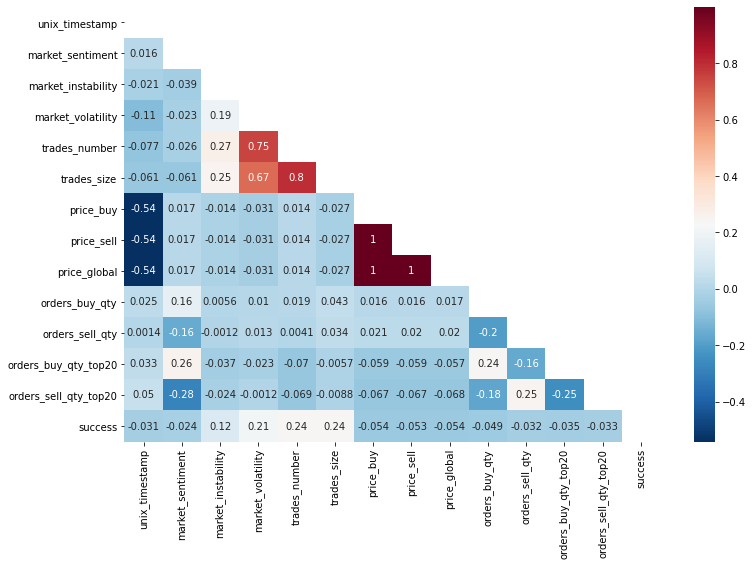

In [178]:
cor_mat = train_df.corr(method="spearman")
lower_triangle_mask = np.triu(np.ones(cor_mat.shape)).astype(np.bool)
cor_mat_lower = cor_mat.mask(lower_triangle_mask)

plt.figure(figsize = (12,8)) # <-- just sets the figure size 
sns.heatmap(cor_mat_lower, 
            annot=True,     # <-- write the numbers on the squares
            cmap='RdBu_r'); # <-- use a "red into blue, reversed" colormap